In [1]:
import h2o

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.5" 2024-10-15 LTS; OpenJDK Runtime Environment Microsoft-10376803 (build 21.0.5+11-LTS); OpenJDK 64-Bit Server VM Microsoft-10376803 (build 21.0.5+11-LTS, mixed mode, sharing)
  Starting server from /usr/local/python/3.12.1/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcsxlhtn1
  JVM stdout: /tmp/tmpcsxlhtn1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcsxlhtn1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
 successful.o H2O server at http://127.0.0.1:54321 ...
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_iqhci4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.886 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
data = h2o.import_file("data/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
data.describe()

Rows:10000
Cols:14

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
type,int,int,enum,int,enum,enum,int,int,real,int,int,int,real,int
mins,1.0,15565701.0,,350.0,,,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
mean,5000.5,15690940.569400003,,650.5288000000002,,,38.921800000000005,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881,0.2037
maxs,10000.0,15815690.0,,850.0,,,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0
sigma,2886.8956799071675,71936.18612274881,,96.65329873613035,,,10.487806451704609,2.8921743770496837,62397.40520238596,0.5816543579989906,0.4558404644751334,0.49979692845891893,57510.49281769816,0.40276858399486093
zeros,0,0,,0,,,0,413,3617,0,2945,4849,0,7963
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0


In [5]:
data.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [6]:
target = "Exited"
features = [col for col in data.columns if col != target]

In [7]:
data[target] = data[target].asfactor()
data["Gender"] = data["Gender"].asfactor()

In [8]:
train, test = data.split_frame(ratios=[0.8], seed=1234)

In [9]:
from h2o.automl import H2OAutoML

In [10]:
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [11]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_4_AutoML_1_20250307_192421,0.866608,0.328414,0.707029,0.234592,0.315245,0.0993791
StackedEnsemble_AllModels_4_AutoML_1_20250307_192421,0.866309,0.328336,0.707909,0.22575,0.31516,0.099326
StackedEnsemble_AllModels_3_AutoML_1_20250307_192421,0.866283,0.328266,0.707489,0.230175,0.315222,0.0993648
GBM_grid_1_AutoML_1_20250307_192421_model_2,0.86624,0.329656,0.706889,0.229706,0.315371,0.0994589
GBM_grid_1_AutoML_1_20250307_192421_model_17,0.865807,0.331576,0.703924,0.227072,0.316582,0.100224
StackedEnsemble_AllModels_2_AutoML_1_20250307_192421,0.865056,0.329882,0.704487,0.23677,0.316044,0.0998835
StackedEnsemble_BestOfFamily_5_AutoML_1_20250307_192421,0.865038,0.329171,0.705425,0.23296,0.314997,0.0992233
StackedEnsemble_BestOfFamily_3_AutoML_1_20250307_192421,0.864757,0.329727,0.704936,0.229941,0.31557,0.0995846
XGBoost_grid_1_AutoML_1_20250307_192421_model_49,0.863819,0.335139,0.687979,0.235526,0.318936,0.10172
XGBoost_grid_1_AutoML_1_20250307_192421_model_15,0.86351,0.334644,0.692591,0.234676,0.318438,0.101403


In [12]:
predictions = aml.leader.predict(test)
predictions.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.941471,0.0585286
0,0.947975,0.0520252
0,0.976984,0.0230158
0,0.984226,0.0157741
1,0.283171,0.716829
0,0.983589,0.0164105
0,0.976913,0.0230871
0,0.962017,0.037983
0,0.863093,0.136907
0,0.977555,0.0224453


In [13]:
model_path = h2o.save_model(model=aml.leader, path="churn_ml_v1", force=True)
print(model_path)

/workspaces/ds_master_imf_prometean/m4_aprendizaje_automatico/u6_soluciones_nube_ml/churn_ml_v1/StackedEnsemble_BestOfFamily_4_AutoML_1_20250307_192421


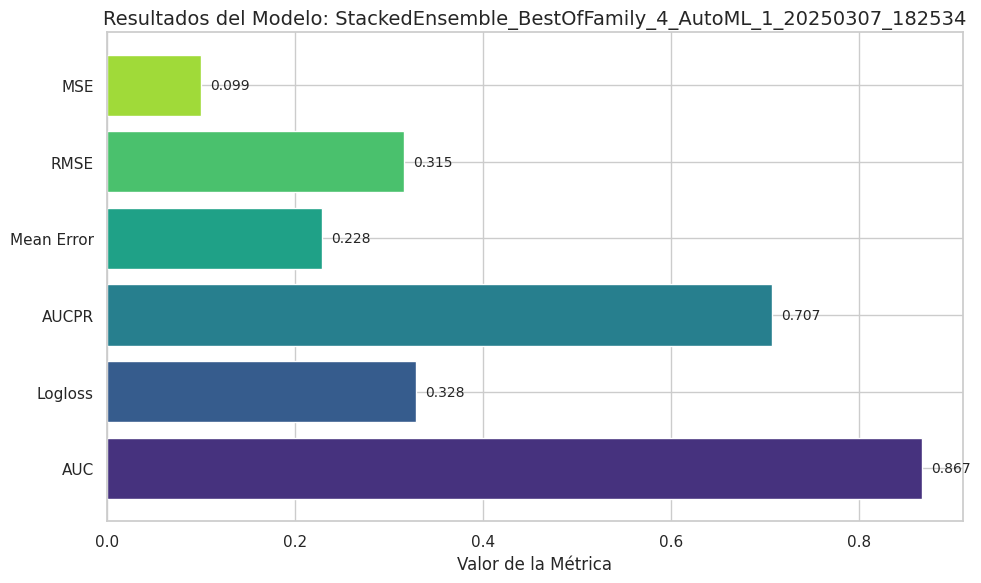

In [14]:
sns.set(style="whitegrid")

metrics = ['AUC', 'Logloss', 'AUCPR', 'Mean Error', 'RMSE', 'MSE']
values = [0.866745, 0.328296, 0.70729, 0.228464, 0.315196, 0.0993486]

plt.figure(figsize=(10, 6))
bars = plt.barh(metrics, values, color=sns.color_palette("viridis", len(metrics)))

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center', fontsize=10)

plt.xlabel('Valor de la Métrica', fontsize=12)
plt.title('Resultados del Modelo: StackedEnsemble_BestOfFamily_4_AutoML_1_20250307_182534', fontsize=14)
plt.tight_layout()

plt.show()